<a href="https://colab.research.google.com/github/nabdeep-patel/google-colab/blob/main/Data%20Analysis%20Part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas dataframe and display the first 10 rows
url = "https://drive.google.com/uc?id=1_UUe-ZnOKOxUmzWnmm2rnEggM_4lYt9h"
df = pd.read_csv(url)
df.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62
6,2011,FEMALE,HISPANIC,HAILEY,126,8
7,2011,FEMALE,HISPANIC,HALEY,14,74
8,2011,FEMALE,HISPANIC,HANNAH,17,71
9,2011,FEMALE,HISPANIC,HAYLEE,17,71


In [3]:
# Identify the data types of each column and check for any missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49509 entries, 0 to 49508
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       49509 non-null  int64 
 1   Gender              49509 non-null  object
 2   Ethnicity           49509 non-null  object
 3   Child's First Name  49509 non-null  object
 4   Count               49509 non-null  int64 
 5   Rank                49509 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

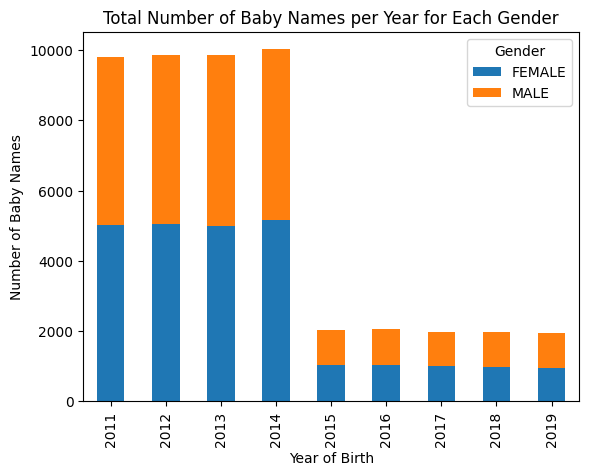

In [4]:
# Create a bar chart that shows the total number of baby names per year for each gender
df.groupby(['Year of Birth', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Total Number of Baby Names per Year for Each Gender')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Baby Names')
plt.legend(title='Gender')
plt.show()

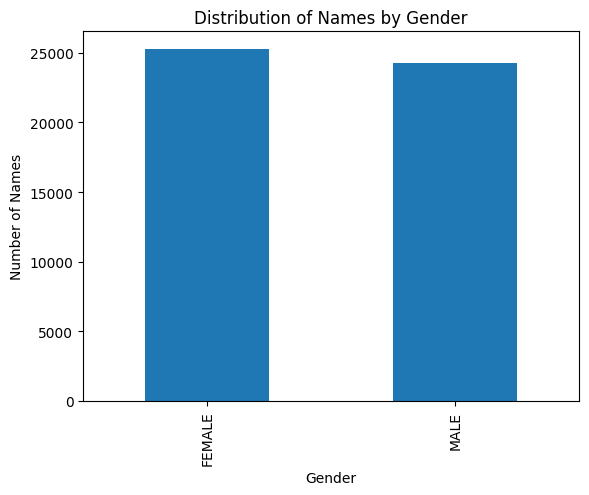

In [5]:
# Create a bar chart that shows the distribution of names for each gender
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Names by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Names')
plt.show()

Part 2 Data Cleaning

In [9]:
# Display duplicated rows for the year 2011
duplicated_rows_2011 = df[df.duplicated()]

# Show duplicated rows
print("Duplicated Rows:")
print(duplicated_rows_2011)

Duplicated Rows:
       Year of Birth  Gender           Ethnicity Child's First Name  Count  \
543             2011  FEMALE  WHITE NON HISPANIC           SCARLETT     31   
772             2011  FEMALE  WHITE NON HISPANIC             SERENA     16   
808             2011  FEMALE  WHITE NON HISPANIC             SHAINA     16   
878             2011  FEMALE  WHITE NON HISPANIC           SHAINDEL     15   
1049            2011  FEMALE  WHITE NON HISPANIC            SHAINDY     48   
...              ...     ...                 ...                ...    ...   
39524           2014    MALE  WHITE NON HISPANIC             Yousef     18   
39525           2014    MALE  WHITE NON HISPANIC            Youssef     24   
39526           2014    MALE  WHITE NON HISPANIC              Yusuf     16   
39527           2014    MALE  WHITE NON HISPANIC            Zachary     90   
39528           2014    MALE  WHITE NON HISPANIC                Zev     49   

       Rank  
543      60  
772      75  
808 

In [10]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(18053, 6)

In [12]:
# 2. Rename columns
df.rename(columns={'Year of Birth': 'Year_of_Birth', "Child's First Name": 'Childs_First_Name'}, inplace=True)

In [14]:
df.head(10)

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62
6,2011,FEMALE,HISPANIC,HAILEY,126,8
7,2011,FEMALE,HISPANIC,HALEY,14,74
8,2011,FEMALE,HISPANIC,HANNAH,17,71
9,2011,FEMALE,HISPANIC,HAYLEE,17,71


In [15]:
# 3. Create a new column for name length
df['Name_Length'] = df['Childs_First_Name'].apply(lambda x: len(''.join(filter(str.isalpha, str(x)))))

In [16]:
df.head(10)

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank,Name_Length
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9
1,2011,FEMALE,HISPANIC,GIA,21,67,3
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7
4,2011,FEMALE,HISPANIC,GRACE,36,53,5
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62,9
6,2011,FEMALE,HISPANIC,HAILEY,126,8,6
7,2011,FEMALE,HISPANIC,HALEY,14,74,5
8,2011,FEMALE,HISPANIC,HANNAH,17,71,6
9,2011,FEMALE,HISPANIC,HAYLEE,17,71,6


In [18]:
# 4. Create a new column for percentage of babies with each name
df['Percentage'] = (df.groupby(['Year_of_Birth', 'Gender'])['Count'].transform(lambda x: x / x.sum()) * 100).round(2)

In [19]:
df.head(10)

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank,Name_Length,Percentage
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9,0.04
1,2011,FEMALE,HISPANIC,GIA,21,67,3,0.07
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6,0.17
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7,0.13
4,2011,FEMALE,HISPANIC,GRACE,36,53,5,0.12
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62,9,0.09
6,2011,FEMALE,HISPANIC,HAILEY,126,8,6,0.43
7,2011,FEMALE,HISPANIC,HALEY,14,74,5,0.05
8,2011,FEMALE,HISPANIC,HANNAH,17,71,6,0.06
9,2011,FEMALE,HISPANIC,HAYLEE,17,71,6,0.06


In [20]:
# 5. Replace the ethnic category 'Black or African American Non-Hispanic' with 'Black Non-Hispanic'
df['Ethnicity'].replace('Black or African American Non-Hispanic', 'Black Non-Hispanic', inplace=True)

In [21]:
df.head(10)

,Year_of_Birth,Gender,Ethnicity,Childs_First_Name,Count,Rank,Name_Length,Percentage
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,9,0.04
1,2011,FEMALE,HISPANIC,GIA,21,67,3,0.07
2,2011,FEMALE,HISPANIC,GIANNA,49,42,6,0.17
3,2011,FEMALE,HISPANIC,GISELLE,38,51,7,0.13
4,2011,FEMALE,HISPANIC,GRACE,36,53,5,0.12
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62,9,0.09
6,2011,FEMALE,HISPANIC,HAILEY,126,8,6,0.43
7,2011,FEMALE,HISPANIC,HALEY,14,74,5,0.05
8,2011,FEMALE,HISPANIC,HANNAH,17,71,6,0.06
9,2011,FEMALE,HISPANIC,HAYLEE,17,71,6,0.06


Part 3 Data Analysis and Visualization

In [24]:
# 1. Number of children named Jacob in 2018 and ethnicity distribution
jacob_2018 = df[(df['Childs_First_Name'] == 'Jacob') & (df['Year_of_Birth'] == 2018)]
jacob_ethnicity_distribution = jacob_2018.groupby('Ethnicity')['Count'].sum()
print(f"Number of children named Jacob in 2018: {jacob_2018['Count'].sum()}")
print("Ethnicity Distribution:")
print(jacob_ethnicity_distribution)

Number of children named Jacob in 2018: 540
Ethnicity Distribution:
Ethnicity
ASIAN AND PACIFIC ISLANDER     46
BLACK NON HISPANIC             36
HISPANIC                      241
WHITE NON HISPANIC            217
Name: Count, dtype: int64


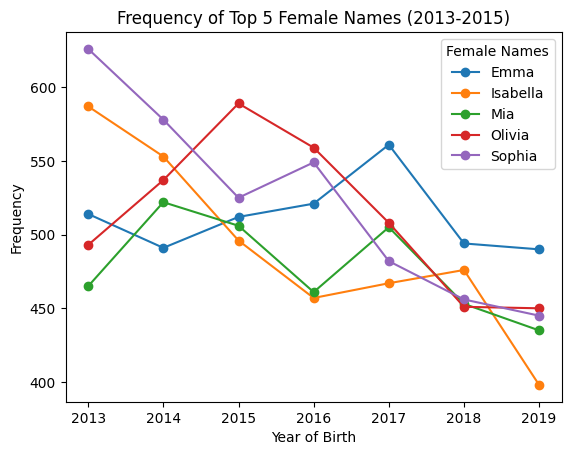

In [26]:
# 2. Line plot for the frequency of the top 5 names for the female gender between 2013 and 2015
top_female_names = df[df['Gender'] == 'FEMALE'].groupby('Childs_First_Name')['Count'].sum().nlargest(5).index
df_top_female_names = df[(df['Gender'] == 'FEMALE') & (df['Childs_First_Name'].isin(top_female_names))]
line_plot_data = df_top_female_names.pivot_table(index='Year_of_Birth', columns='Childs_First_Name', values='Count', aggfunc='sum')
line_plot_data.plot(kind='line', marker='o')
plt.title('Frequency of Top 5 Female Names (2013-2015)')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.legend(title='Female Names')
plt.show()

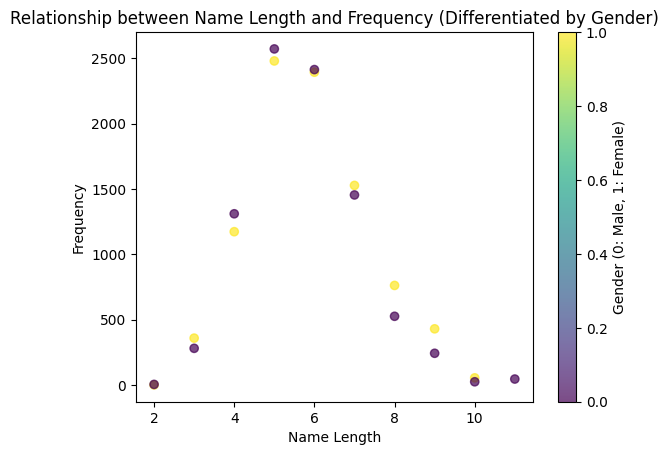

In [27]:
# 3. Scatter plot for the relationship between name length and frequency, differentiated by gender
scatter_plot_data = df.groupby(['Gender', 'Name_Length']).size().reset_index(name='Frequency')
scatter_plot_data['Gender'] = scatter_plot_data['Gender'].map({'MALE': 0, 'FEMALE': 1})
plt.scatter(scatter_plot_data['Name_Length'], scatter_plot_data['Frequency'], c=scatter_plot_data['Gender'], cmap='viridis', alpha=0.7)
plt.title('Relationship between Name Length and Frequency (Differentiated by Gender)')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.colorbar(label='Gender (0: Male, 1: Female)')
plt.show()

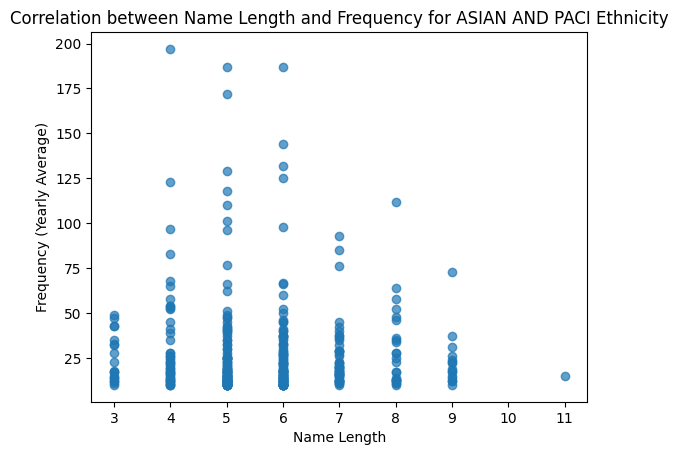

In [28]:
# 4. Scatter plot for the correlation between name length and frequency for the 'ASIAN AND PACI' ethnicity
asian_pacific_data = df[df['Ethnicity'] == 'ASIAN AND PACI'].groupby(['Childs_First_Name', 'Name_Length'])['Count'].mean().reset_index()
plt.scatter(asian_pacific_data['Name_Length'], asian_pacific_data['Count'], alpha=0.7)
plt.title('Correlation between Name Length and Frequency for ASIAN AND PACI Ethnicity')
plt.xlabel('Name Length')
plt.ylabel('Frequency (Yearly Average)')
plt.show()